# Red neuronal simple usando los dígitos escritos a mano de MNIST

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


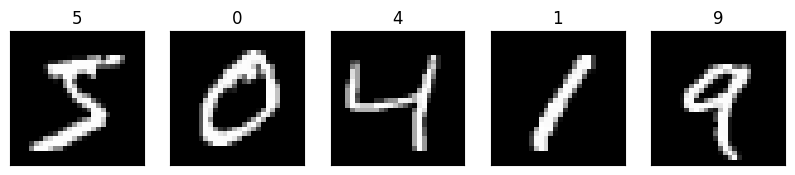

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist

# Cargar datos de dígitos escritos a mano de MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Mostrar algunas imágenes de dígitos
fig, axes = plt.subplots(ncols=5, sharex=False,
			 sharey=True, figsize=(10, 4))
for i in range(5):
	axes[i].set_title(y_train[i])
	axes[i].imshow(X_train[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()

## Preparación de datos

In [2]:
# Convertir y_train en formato one-hot
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))

y_train = np.array(temp)

# Convertir y_test en formato one-hot
temp = []
for i in range(len(y_test)):
    temp.append(to_categorical(y_test[i], num_classes=10))

y_test = np.array(temp)

## Crear la red

In [3]:
# Crear la red neuronal
# Crear un modelo de Red Neuronal Secuencial
model = Sequential()

# Aplanar las imágenes de entrada de 28x28 píxeles en un vector de 784 dimensiones
model.add(Flatten(input_shape=(28, 28)))

# Añadir una capa densa totalmente conectada con 5 neuronas y activación sigmoid
model.add(Dense(5, activation='sigmoid'))

# Añadir la capa de salida con 10 neuronas y activación softmax para clasificación en 10 clases
model.add(Dense(10, activation='softmax'))

model.summary()

# categorical_crossentropy: calcula la divergencia entre la distribución de probabilidades predicha por la red
# (salida de la capa softmax) y las etiquetas verdaderas (codificadas de manera one-hot).
# adam: ajusta los pesos del modelo durante el proceso de entrenamiento para minimizar la función de pérdida.
# acc: monitorear la métrica de exactitud (accuracy o acc) durante el entrenamiento y la evaluación.
model.compile(loss='categorical_crossentropy',
	      optimizer='adam',
	      metrics=['acc'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │           3,925 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │              60 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,985 (15.57 KB)

 Trainable params: 3,985 (15.57 KB)

 Non-trainable params: 0 (0.00 B)

## Entrenar la red

In [4]:
# Entrenamiento
model.fit(X_train, y_train, epochs=5, validation_data=(X_test,y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.3479 - loss: 1.9239 - val_acc: 0.5985 - val_loss: 1.3712
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.6009 - loss: 1.3258 - val_acc: 0.6554 - val_loss: 1.1257
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.6630 - loss: 1.0906 - val_acc: 0.7471 - val_loss: 0.9361
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.7434 - loss: 0.9037 - val_acc: 0.7660 - val_loss: 0.8423
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.7579 - loss: 0.8468 - val_acc: 0.7577 - val_loss: 0.8232


## Predicciones

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


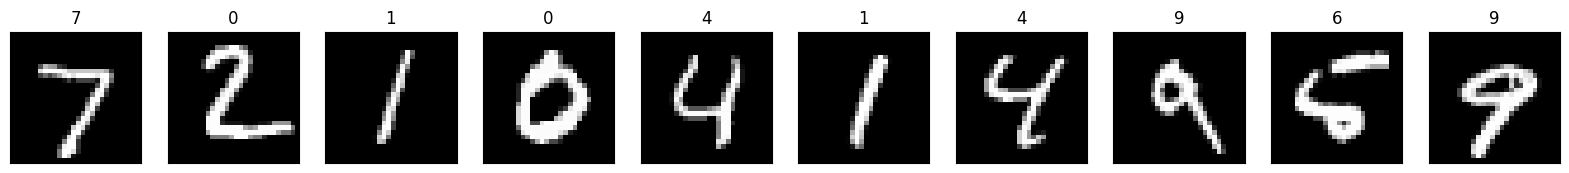

In [5]:
# Predicciones
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

# Predicciones con algunos datos de test
fig, axes = plt.subplots(ncols=10, sharex=False,
			 sharey=True, figsize=(20, 4))
for i in range(10):
	axes[i].set_title(predictions[i])
	axes[i].imshow(X_test[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()